> Import dataset

In [ ]:
# Import libraries

import os
import shutil
import random
import numpy as np
import pandas as pd
import seaborn as sns
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score

plt.rc('font', size=16) 

tfk = tf.keras
tfkl = tf.keras.layers
print(tf.__version__)

2.6.4


In [ ]:
# Set seed for reproducibility

seed = 42

random.seed(seed)
os.environ['PYTHONHASHSEED'] = str(seed)
np.random.seed(seed)
tf.random.set_seed(seed)
tf.compat.v1.set_random_seed(seed)

In [ ]:
# Load the dataset

x_data = np.load('../input/training-dataset-homework2zip/x_train.npy')
y_data = np.load('../input/training-dataset-homework2zip/y_train.npy')
x_data.shape, y_data.shape

((2429, 36, 6), (2429,))

> Inspect data

In [ ]:
labels = ['Wish',         # 0
          'Another',      # 1
          'Comfortably',  # 2
          'Money',        # 3
          'Breathe',      # 4
          'Time',         # 5
          'Brain',        # 6
          'Echoes',       # 7
          'Wearing',      # 8
          'Sorrow',       # 9
          'Hey',          # 10
          'Shine']        # 11

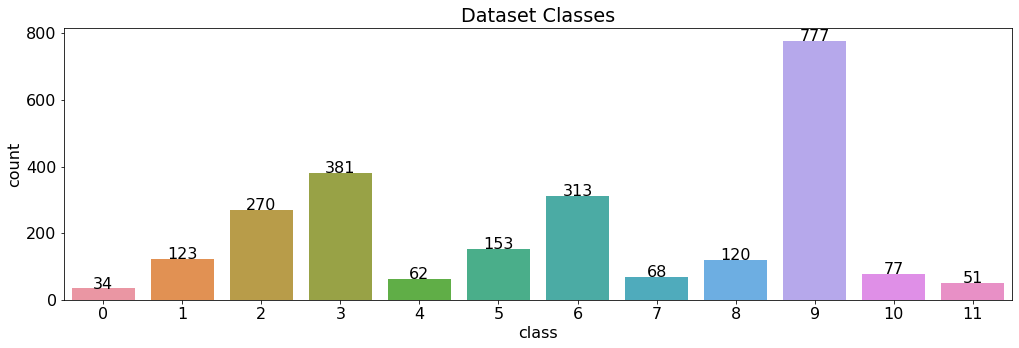

In [ ]:
# Inspect classes

df = pd.DataFrame(y_data, columns = ['class'])

plt.figure(figsize=(17,5))
graph = sns.countplot(x = 'class', data = df)

i=0
for p in graph.patches:
    height = p.get_height()
    graph.text(p.get_x()+p.get_width()/2., height + 0.1,
        df['class'].value_counts()[i],ha="center")
    i += 1

plt.title('Dataset Classes')
plt.show()


> Preprocessing

In [ ]:
# Reshape data

#reshape the data in a format where each feature is a column
num_instances, num_time_steps, num_features = x_data.shape
x_data_flat = np.reshape(x_data, newshape=(-1, num_features))

#create the dataframe
columns = ['col_0','col_1','col_2','col_3','col_4','col_5']
df_data = pd.DataFrame(x_data_flat, columns = columns)
df_data

,col_0,col_1,col_2,col_3,col_4,col_5
0,17.59700,8.17130,-1.78420,-19.70600,-9.71350,-61.8870
1,0.22974,-5.89560,16.83700,5.03900,2.43320,58.9140
2,-29.65400,-21.29600,29.10300,-0.47503,75.39100,10.6650
3,-59.21000,-29.56500,17.97100,-45.60600,19.41200,-43.0140
4,-72.06400,-25.85500,0.46536,-59.15100,-29.10500,-11.9130
...,...,...,...,...,...,...
87439,3.51190,-1.03240,-1.69900,4.15790,2.75430,5.9823
87440,0.70853,-0.94622,-1.91760,2.09480,-4.76750,7.4118
87441,0.20638,1.02870,-0.92512,-0.71633,1.73330,4.7638
87442,4.14290,1.09390,-0.18921,1.14100,0.93441,4.1742


In [ ]:
# Reshape labels

y_data_flat = []
for i in range(0, y_data.shape[0]):
    for j in range (i*36,(i+1)*36):
        y_data_flat = np.append(y_data_flat, y_data[i])
y_data_flat = y_data_flat.astype(int)

df_data["class"] = y_data_flat
df_data

,col_0,col_1,col_2,col_3,col_4,col_5,class
0,17.59700,8.17130,-1.78420,-19.70600,-9.71350,-61.8870,0
1,0.22974,-5.89560,16.83700,5.03900,2.43320,58.9140,0
2,-29.65400,-21.29600,29.10300,-0.47503,75.39100,10.6650,0
3,-59.21000,-29.56500,17.97100,-45.60600,19.41200,-43.0140,0
4,-72.06400,-25.85500,0.46536,-59.15100,-29.10500,-11.9130,0
...,...,...,...,...,...,...,...
87439,3.51190,-1.03240,-1.69900,4.15790,2.75430,5.9823,11
87440,0.70853,-0.94622,-1.91760,2.09480,-4.76750,7.4118,11
87441,0.20638,1.02870,-0.92512,-0.71633,1.73330,4.7638,11
87442,4.14290,1.09390,-0.18921,1.14100,0.93441,4.1742,11


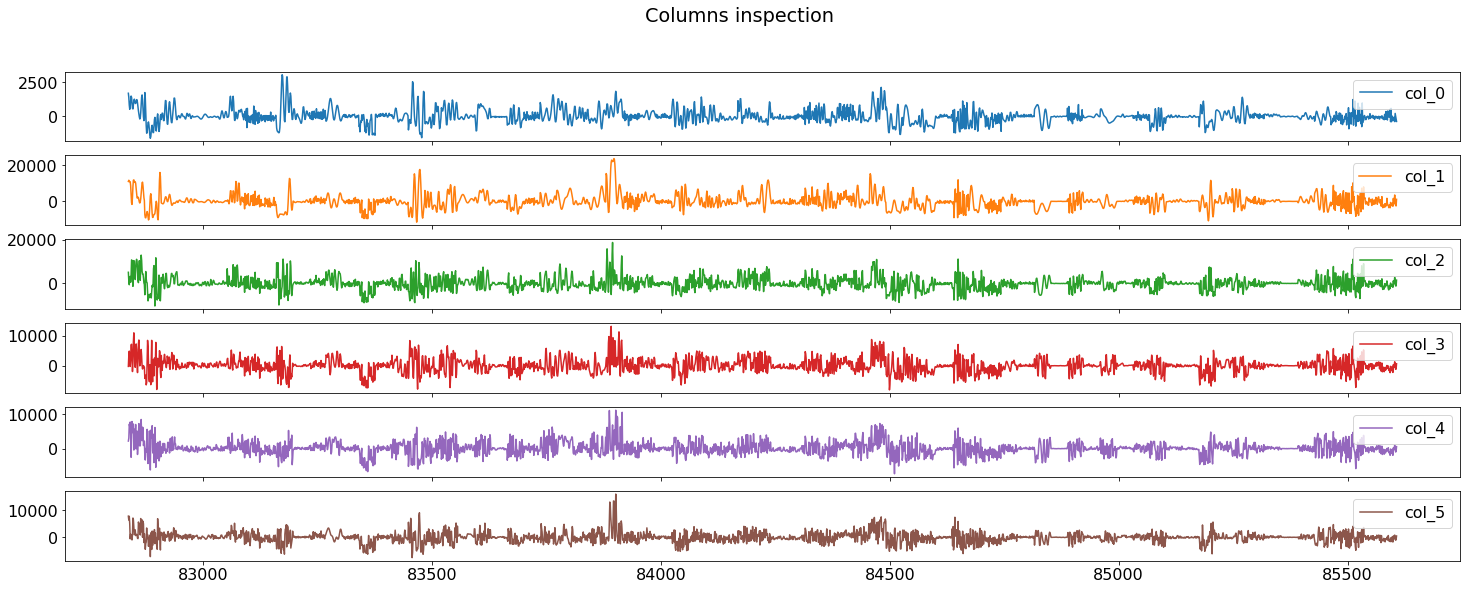

In [ ]:
# Show columns' trends

axis = (df_data[df_data['class'] == 10][columns]).plot(subplots=True, figsize=(25, 9), title="Columns inspection")
for ax in axis:
    ax.legend(loc='upper right')

In [ ]:
# Show sequence's trend

def inspect_seq(x_seq, idx):
    x_values = np.reshape(x_seq[idx], newshape=(-1, x_seq.shape[2])) #reshape and select the idx-th element 
    x_values = pd.DataFrame(x_values, columns = columns) #convert into dataframe

    axis = x_values.plot(subplots=True, figsize=(17, 9), title="Columns inspection") #plot each column
    for ax in axis:
        ax.legend(loc='upper right')

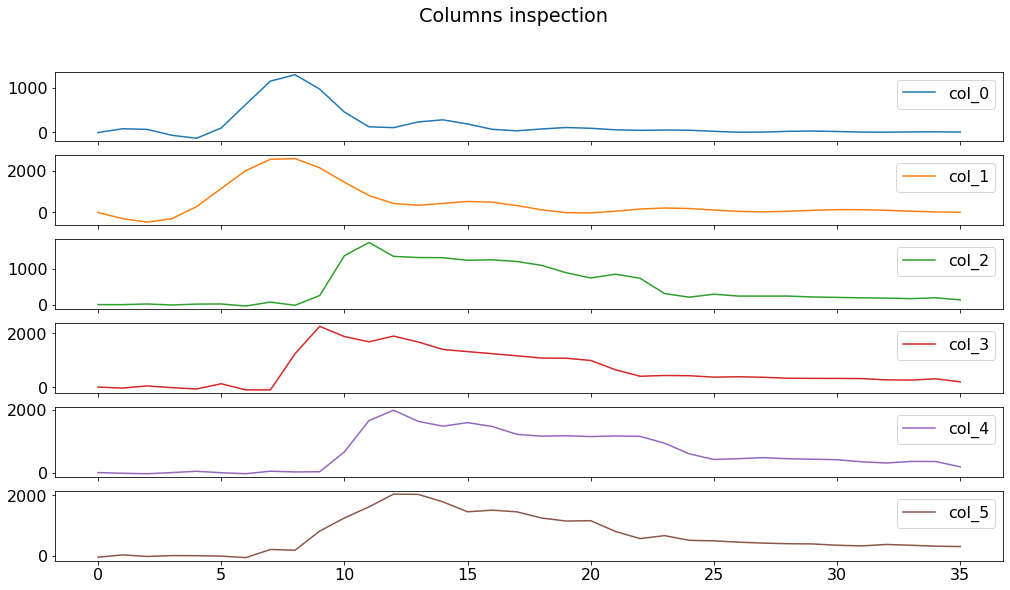

In [ ]:
# Inspect n-th sequence

n = 2400
inspect_seq(x_data, n)

In [ ]:
# Split into train and test

x_train, x_test, y_train, y_test = train_test_split(x_data,y_data, test_size=0.2, random_state=seed, shuffle=True, stratify=y_data)
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((1943, 36, 6), (486, 36, 6), (1943,), (486,))

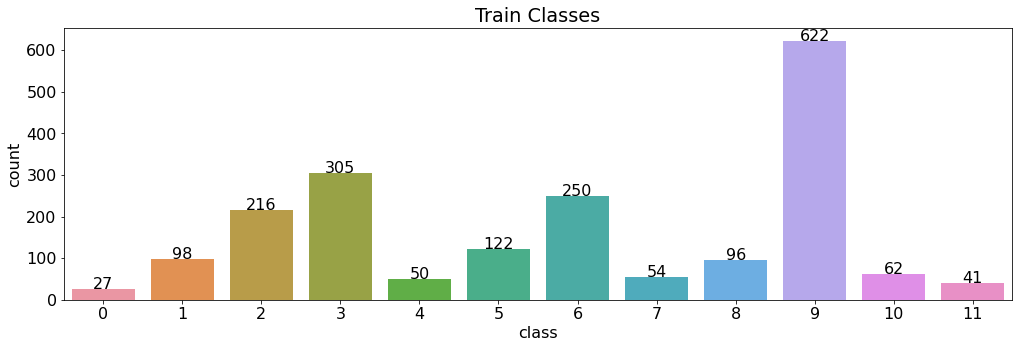

In [ ]:
# Inspect train split

df = pd.DataFrame(y_train, columns = ['class'])

plt.figure(figsize=(17,5))
graph = sns.countplot(x = 'class', data = df)

i=0
for p in graph.patches:
    height = p.get_height()
    graph.text(p.get_x()+p.get_width()/2., height + 0.1,
        df['class'].value_counts()[i],ha="center")
    i += 1

plt.title('Train Classes')
plt.show()

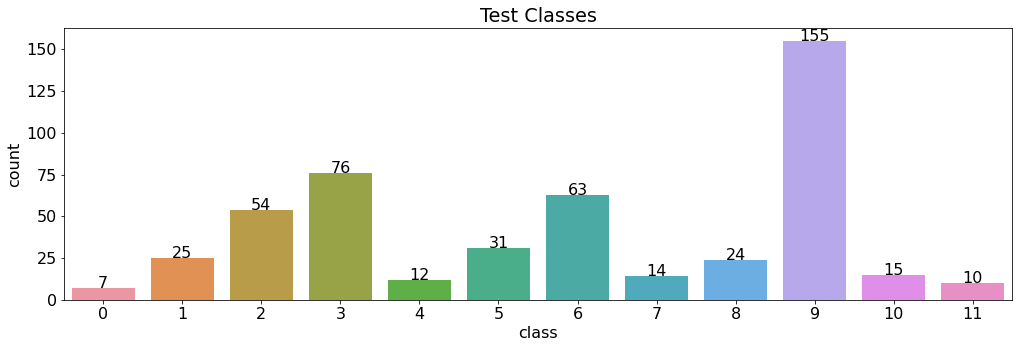

In [ ]:
# Inspect test split

df = pd.DataFrame(y_test, columns = ['class'])

plt.figure(figsize=(17,5))
graph = sns.countplot(x = 'class', data = df)

i=0
for p in graph.patches:
    height = p.get_height()
    graph.text(p.get_x()+p.get_width()/2., height + 0.1,
        df['class'].value_counts()[i],ha="center")
    i += 1

plt.title('Test Classes')
plt.show()

In [ ]:
# Define weights for class imbalance

total = 2429
n_classes = 12.0

weight_for_c0 = (1 / 34) * (total / n_classes)
weight_for_c1 = (1 / 123) * (total / n_classes)
weight_for_c2 = (1 / 270) * (total / n_classes)
weight_for_c3 = (1 / 381) * (total / n_classes)
weight_for_c4 = (1 / 62) * (total / n_classes)
weight_for_c5 = (1 / 153) * (total / n_classes)
weight_for_c6 = (1 / 313) * (total / n_classes)
weight_for_c7 = (1 / 68) * (total / n_classes)
weight_for_c8 = (1 / 120) * (total / n_classes)
weight_for_c9 = (1 / 777) * (total / n_classes)
weight_for_c10 = (1 / 77) * (total / n_classes)
weight_for_c11 = (1 / 51) * (total / n_classes)

class_weight = {0: weight_for_c0, 1: weight_for_c1, 2: weight_for_c2, 3: weight_for_c3,
                4: weight_for_c4, 5: weight_for_c5, 6: weight_for_c6, 7: weight_for_c7,
                8: weight_for_c8, 9: weight_for_c9, 10: weight_for_c10, 11: weight_for_c11}


print('Weight for class 0: {:.2f}'.format(weight_for_c0))
print('Weight for class 1: {:.2f}'.format(weight_for_c1))
print('Weight for class 2: {:.2f}'.format(weight_for_c2))
print('Weight for class 3: {:.2f}'.format(weight_for_c3))
print('Weight for class 4: {:.2f}'.format(weight_for_c4))
print('Weight for class 5: {:.2f}'.format(weight_for_c5))
print('Weight for class 6: {:.2f}'.format(weight_for_c6))
print('Weight for class 7: {:.2f}'.format(weight_for_c7))
print('Weight for class 8: {:.2f}'.format(weight_for_c8))
print('Weight for class 9: {:.2f}'.format(weight_for_c9))
print('Weight for class 10: {:.2f}'.format(weight_for_c10))
print('Weight for class 11: {:.2f}'.format(weight_for_c11))

Weight for class 0: 5.95
Weight for class 1: 1.65
Weight for class 2: 0.75
Weight for class 3: 0.53
Weight for class 4: 3.26
Weight for class 5: 1.32
Weight for class 6: 0.65
Weight for class 7: 2.98
Weight for class 8: 1.69
Weight for class 9: 0.26
Weight for class 10: 2.63
Weight for class 11: 3.97


In [ ]:
# Convert labels in one-hot-encoding

print(y_train[0])
y_train = tfk.utils.to_categorical(y_train)
y_test = tfk.utils.to_categorical(y_test)
print(y_train[0])

3
[0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]


> Build and train the model

In [ ]:
# Define parameter of the model

input_shape = x_train.shape[1:]
classes = y_train.shape[-1]
batch_size = 128
epochs = 200

In [ ]:
# Define the model

def build_LSTM_classifier(input_shape, classes):
    input_layer = tfkl.Input(shape=input_shape, name='Input')

    # Feature extractor
    lstm = tfkl.LSTM(256, return_sequences=True)(input_layer) 
    lstm = tfkl.LSTM(256)(lstm)
    dropout = tfkl.Dropout(.5, seed=seed)(lstm)

    # Classifier
    classifier = tfkl.Dense(256, activation='relu')(dropout) 
    output_layer = tfkl.Dense(classes, activation='softmax')(classifier) 
    
    model = tfk.Model(inputs=input_layer, outputs=output_layer, name='model')

    model.compile(loss=tfk.losses.CategoricalCrossentropy(), optimizer=tfk.optimizers.Adam(), metrics='accuracy')

    return model

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
Input (InputLayer)           [(None, 36, 6)]           0         
_________________________________________________________________
lstm_4 (LSTM)                (None, 36, 256)           269312    
_________________________________________________________________
lstm_5 (LSTM)                (None, 256)               525312    
_________________________________________________________________
dropout_2 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense_4 (Dense)              (None, 256)               65792     
_________________________________________________________________
dense_5 (Dense)              (None, 12)                3084      
Total params: 863,500
Trainable params: 863,500
Non-trainable params: 0
_______________________________________________________

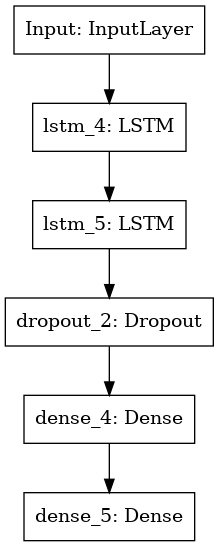

In [ ]:
# Build the model

model = build_LSTM_classifier(input_shape, classes)
model.summary()
tfk.utils.plot_model(model)

In [ ]:
# Train the model

history = model.fit(
    x = x_train,
    y = y_train,
    batch_size = batch_size,
    epochs = epochs,
    validation_data = (x_test, y_test),
    class_weight = class_weight,
    callbacks = [
        tfk.callbacks.EarlyStopping(monitor='val_accuracy', mode='max', patience=15, restore_best_weights=True),
        tfk.callbacks.ReduceLROnPlateau(monitor='val_accuracy', mode='max', patience=7, factor=0.75, min_lr=1e-5)
    ]
).history

Epoch 1/200
16/16 [==============================] - 3s 54ms/step - loss: 2.1969 - accuracy: 0.1827 - val_loss: 1.9232 - val_accuracy: 0.2346
Epoch 2/200
16/16 [==============================] - 0s 14ms/step - loss: 1.6639 - accuracy: 0.2748 - val_loss: 1.7740 - val_accuracy: 0.2922
Epoch 3/200
16/16 [==============================] - 0s 13ms/step - loss: 1.4219 - accuracy: 0.3901 - val_loss: 1.5929 - val_accuracy: 0.4095
Epoch 4/200
16/16 [==============================] - 0s 13ms/step - loss: 1.2791 - accuracy: 0.3999 - val_loss: 1.6801 - val_accuracy: 0.3457
Epoch 5/200
16/16 [==============================] - 0s 14ms/step - loss: 1.1297 - accuracy: 0.4400 - val_loss: 1.4067 - val_accuracy: 0.3992
Epoch 6/200
16/16 [==============================] - 0s 14ms/step - loss: 0.9717 - accuracy: 0.4910 - val_loss: 1.3648 - val_accuracy: 0.4342
Epoch 7/200
16/16 [==============================] - 0s 14ms/step - loss: 0.9416 - accuracy: 0.4931 - val_loss: 1.3741 - val_accuracy: 0.4835
Epoch 

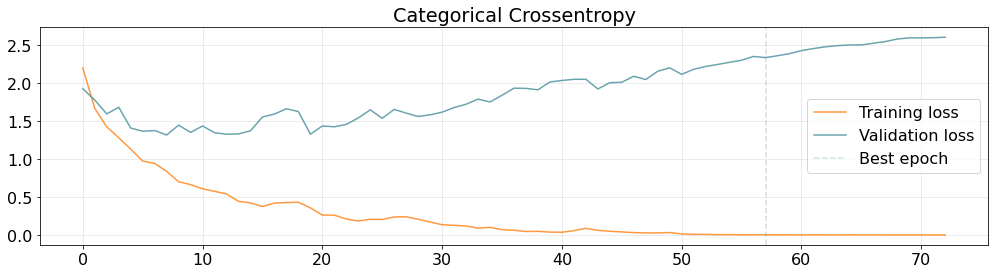

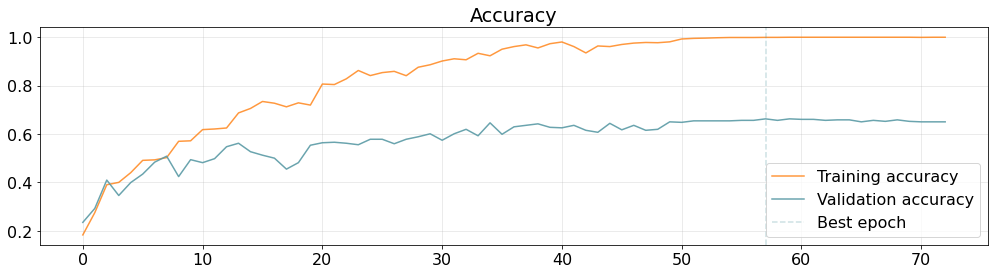

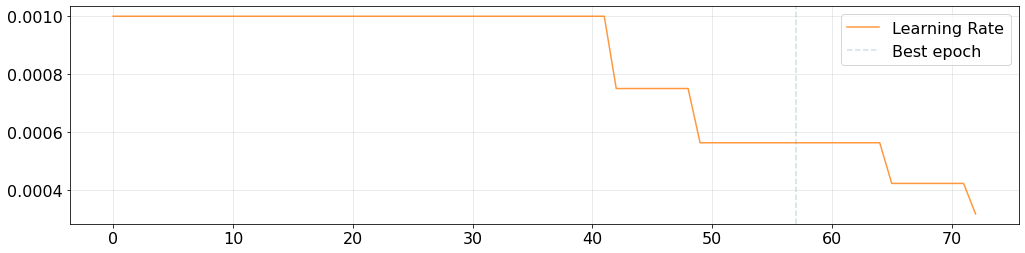

In [ ]:
# Plot results

best_epoch = np.argmax(history['val_accuracy'])
plt.figure(figsize=(17,4))
plt.plot(history['loss'], label='Training loss', alpha=.8, color='#ff7f0e')
plt.plot(history['val_loss'], label='Validation loss', alpha=.9, color='#5a9aa5')
plt.axvline(x=best_epoch, label='Best epoch', alpha=.3, ls='--', color='#5a9aa5')
plt.title('Categorical Crossentropy')
plt.legend()
plt.grid(alpha=.3)
plt.show()

plt.figure(figsize=(17,4))
plt.plot(history['accuracy'], label='Training accuracy', alpha=.8, color='#ff7f0e')
plt.plot(history['val_accuracy'], label='Validation accuracy', alpha=.9, color='#5a9aa5')
plt.axvline(x=best_epoch, label='Best epoch', alpha=.3, ls='--', color='#5a9aa5')
plt.title('Accuracy')
plt.legend()
plt.grid(alpha=.3)
plt.show()

plt.figure(figsize=(17,4))
plt.plot(history['lr'], label='Learning Rate', alpha=.8, color='#ff7f0e')
plt.axvline(x=best_epoch, label='Best epoch', alpha=.3, ls='--', color='#5a9aa5')
plt.legend()
plt.grid(alpha=.3)
plt.show()

In [ ]:
# Predict the test set 

predictions = model.predict(x_test)
predictions.shape

(486, 12)

Accuracy: 0.6626
Precision: 0.6246
Recall: 0.5665
F1: 0.5861


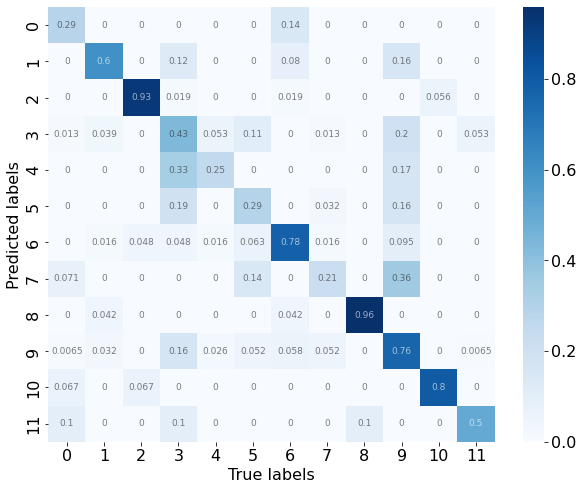

In [ ]:
# Compute the confusion matrix

cm = confusion_matrix(np.argmax(y_test, axis=-1), np.argmax(predictions, axis=-1))

cm = cm /cm.astype(float).sum(axis=1);

# Compute the classification metrics
accuracy = accuracy_score(np.argmax(y_test, axis=-1), np.argmax(predictions, axis=-1))
precision = precision_score(np.argmax(y_test, axis=-1), np.argmax(predictions, axis=-1), average='macro')
recall = recall_score(np.argmax(y_test, axis=-1), np.argmax(predictions, axis=-1), average='macro')
f1 = f1_score(np.argmax(y_test, axis=-1), np.argmax(predictions, axis=-1), average='macro')
print('Accuracy:',accuracy.round(4))
print('Precision:',precision.round(4))
print('Recall:',recall.round(4))
print('F1:',f1.round(4))

# Plot the confusion matrix
plt.figure(figsize=(10,8))
sns.heatmap(cm.T, cmap='Blues', annot=True, annot_kws={'fontsize':9,'alpha':0.6})
plt.xlabel('True labels')
plt.ylabel('Predicted labels')
plt.show()

In [ ]:
# Save the model

model.save('SubmissionModel')
shutil.make_archive("SubmissionModel", 'zip', "./SubmissionModel")